<a href="https://colab.research.google.com/github/NataliaLak/Test_task/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

**Создать прогностическую модель рисков беременных.**

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')
data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
data.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [4]:
data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

**Мы можем рассматривать эту задачу как задачу классификации, где "Risk Level" является целевой переменной. "Risk Level" категориальная переменная, поэтому для оценки модели подходят такие метрики, как точность (Accuracy), F1-мера**

In [5]:
#подготовка данных
data_encoded = pd.get_dummies(data, columns=['RiskLevel'], prefix='Risk')

In [30]:
X = data_encoded.drop(['Risk_low risk', 'Risk_mid risk', 'Risk_high risk'], axis=1)
y = data_encoded[['Risk_low risk', 'Risk_mid risk', 'Risk_high risk']]

In [32]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76


In [33]:
y.head()

,Risk_low risk,Risk_mid risk,Risk_high risk
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,1,0,0


In [7]:
#разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#обучение модели
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [9]:
#предсказание на тренировочном и тестовом наборах данных
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [34]:
#вычисление метрик на тренировочном наборе
train_accuracy = accuracy_score(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))
train_f1 = f1_score(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1), average='weighted')
train_conf_matrix = confusion_matrix(y_train.values.argmax(axis=1), y_train_pred.argmax(axis=1))

In [35]:
#на тестовом наборе
test_accuracy = accuracy_score(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
test_f1 = f1_score(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1), average='weighted')
test_conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))

In [26]:
#вывод метрик на тренировочном наборе
print("Training Metrics:")
print("Train Accuracy:", train_accuracy)
print("Train F1 Score:", train_f1)
print("Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Train Confusion Matrix:")
print(train_conf_matrix)

Training Metrics:
Train Accuracy: 0.9346485819975339
Train F1 Score: 0.9357467167349428
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       326
           1       0.91      0.91      0.91       260
           2       0.95      0.97      0.96       225

   micro avg       0.94      0.93      0.94       811
   macro avg       0.94      0.94      0.94       811
weighted avg       0.94      0.93      0.94       811
 samples avg       0.93      0.93      0.93       811

Train Confusion Matrix:
[[303  20   3]
 [ 14 237   9]
 [  2   4 219]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Metrics:

Train Accuracy: 0.9346

Train F1 Score: 0.9357

Модель достигает высокой точности, полноты и F1-меры для всех трех классов (low risk, mid risk, high risk). Это подтверждается высокими значениями precision, recall и f1-score для каждого класса.

In [24]:
#вывод метрик на тестовом наборе
print("\nTesting Metrics:")
print("Test Accuracy:", test_accuracy)
print("Test F1 Score:", test_f1)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print("Test Confusion Matrix:\n", test_conf_matrix)


Testing Metrics:
Test Accuracy: 0.8226600985221675
Test F1 Score: 0.8229903592046013
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        80
           1       0.77      0.84      0.81        76
           2       0.87      0.85      0.86        47

   micro avg       0.83      0.82      0.82       203
   macro avg       0.83      0.82      0.83       203
weighted avg       0.83      0.82      0.82       203
 samples avg       0.82      0.82      0.82       203

Test Confusion Matrix:
 [[63 14  3]
 [ 9 64  3]
 [ 2  5 40]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Metrics:

Test Accuracy: 0.8227

Test F1 Score: 0.8230


Модель также демонстрирует хорошие результаты на тестовой выборке. Показатели точности, полноты и F1-меры для каждого класса находятся на высоком уровне.

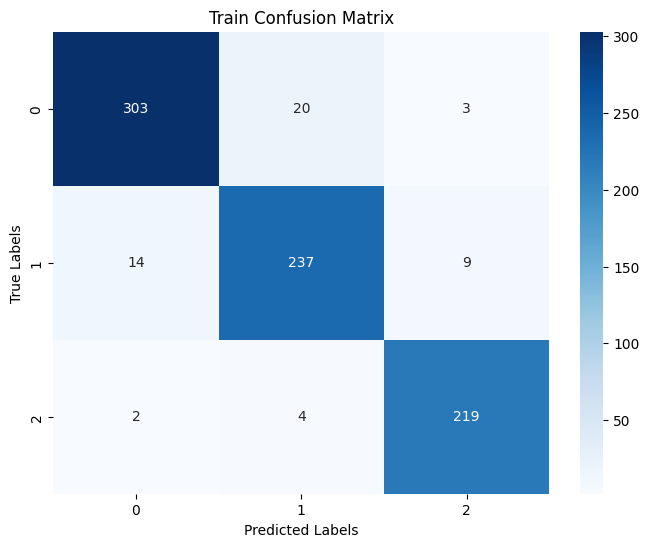

In [27]:
#создание графика матрицы ошибок на тренировочном наборе
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Матрица ошибок демонстрирует хорошее качество модели, с небольшим количеством ложных позитивов и ложных негативов. Матрица ошибок показывает, что модель правильно классифицировала 303 беременных с низким риском, 237 беременных со средним риском и 219 беременных с высоким риском.

Можно заметить, что существуют некоторые ошибки классификации,
например, значение 20 указывает на количество случаев, когда беременные с низким риском были неправильно классифицированы как имеющие средний риск.
Значение 14 указывает на количество случаев, когда беременные среднего риска были неправильно классифицированы как имеющие низкий риск.

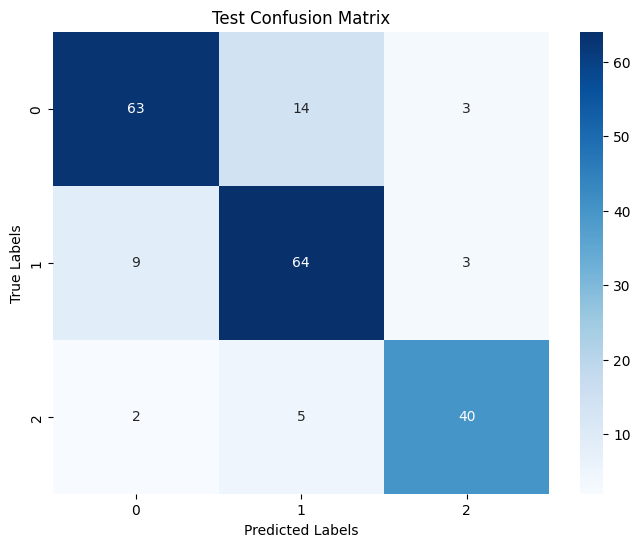

In [28]:
#создание графика матрицы ошибок на тестовом наборе
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Матрица ошибок на тестовой выборке подтверждает качество модели, хотя наблюдаются небольшие расхождения по сравнению с тренировочными метриками, что вполне ожидаемо. Матрица ошибок показывает, что модель правильно классифицировала 63 беременных с низким риском, 64 беременных со средним риском и 40 беременных с высоким риском. Значение 14 указывает на количество случаев, когда беременные с низким риском были неправильно классифицированы как имеющие средний риск, значение 9 указывает на количество случаев, когда беременные среднего риска были неправильно классифицированы как имеющие низкий риск.

Анализ:

Модель демонстрирует высокую точность на трейне (93.46%), что говорит о ее способности обучаться на данных.
F1-мера на трейне также высокая (93.57%), что указывает на сбалансированность модели между точностью и полнотой.
Точность на тесте (82.27%) несколько ниже, чем на трейне, но все же остается достаточно высокой.
F1-мера на тесте (82.30%) также немного ниже, чем на трейне, но это говорит о том, что модель обобщает знания на новые данные.
Матрица ошибок на тесте показывает, что модель чаще всего ошибается при классификации беременных с низким риском, как имеющих средний риск.
